In [3]:
# import seaborn as sns
from scipy.stats import circmean, circstd
from fakespikes.util import create_psd
from pykdf.kdf import load_kdf

%matplotlib inline
from brian2 import *

# EI populations

In [ ]:
%run ../ei.py ei -n 100 -p 2 -q 1 -s 0.5

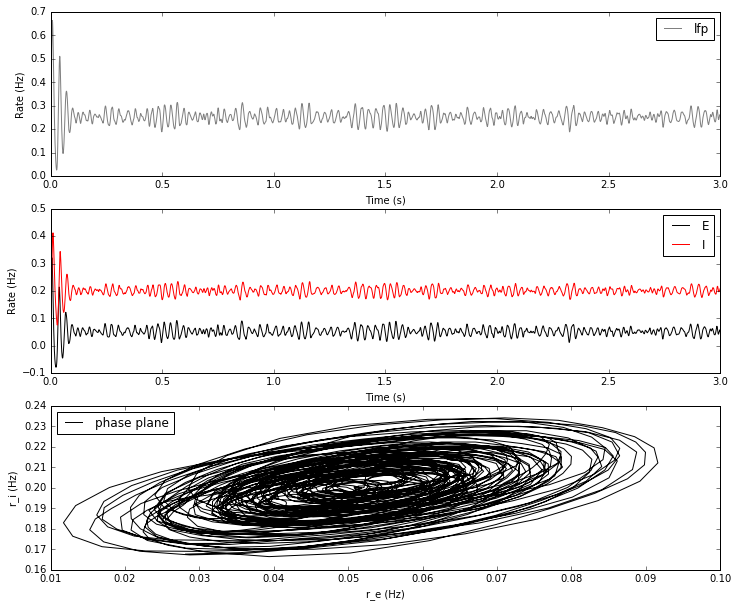

In [15]:
res = load_kdf('ei.hdf5')

# -
t = res['t']
dt = res['dt']
times = np.linspace(0, t, t * int(1 / float(dt)))

# -
Es = res['E']
E = Es.mean(0)

Is = res['I']
I = Is.mean(0)

lfp = res['lfp']

# -
figure(figsize=(12, 10))

subplot(311)
plot(times, lfp, label='lfp', color='grey')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(312)
plot(times, E, label='E', color='k')
plot(times, I, label='I', color='r')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(313)
plot(E[times > 0.5], I[times > 0.5], label='phase plane', color='k')
legend(loc='best')
xlabel("r_e (Hz)")
ylabel("r_i (Hz)")

# subplot(313)
# fs, psd = create_psd(lfp, 1000)
# plot(fs[:100], psd[:100], label='r_e')
# legend(loc='best')
# xlabel("Freq (Hz)")
# ylabel("PSD")

# Coupled oscillators

In [1]:
%run ../kur.py kur -t 3 -k 10 -o 10 -r 2

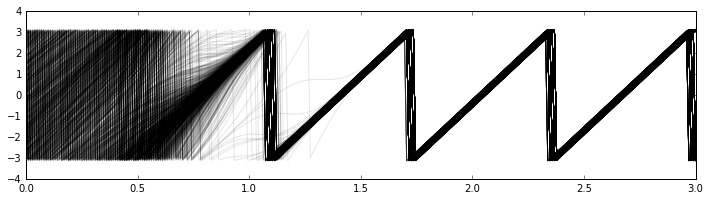

In [4]:
res = load_kdf('kur.hdf5')
times = res['times']

thetas = res['thetas']

figure(figsize=(12, 3))
plot(times, thetas, color='k', alpha=0.1);

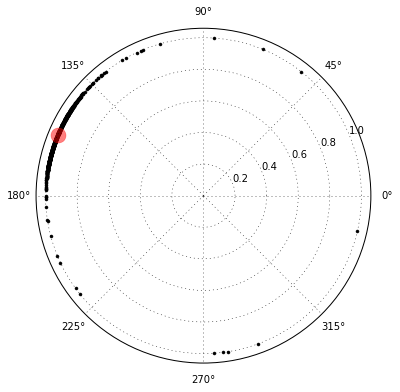

In [5]:
mTheta = circmean(thetas[times > 1, :], axis=0)
r = np.ones_like(mTheta)  # Unit vectors

figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(mTheta, r, '.k')
ax.plot(circmean(mTheta), 1, '.r', markersize=30, alpha=0.5)

In [6]:
# Now sample the avg theta and simulate sin waves with that property, 
# each at freq range defined in the K model
# Use this to create a LFP, and PSD

In [7]:
waves = []
for n in range(N):
    th = thetas[:, n]
    f = omegas[n]
    
    wave = np.sin(f * 2 * np.pi * times + th)
    waves.append(wave)

lfp = np.vstack(waves).mean(0)

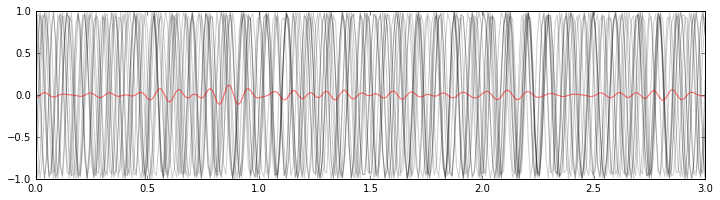

In [8]:
figure(figsize=(12, 3))
for wave in waves[:10]:
    plt.plot(times, wave, color='k', alpha=0.2)

plt.plot(times, lfp, 'r', alpha=0.6)

In [9]:
# fs, psd = create_psd(lfp[times > 1], 1/dt)
# plt.plot(fs, psd, color='k')
# plt.xlim(0, 50)